In [103]:
import polars as pl
import altair as alt
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
data_dir = Path("data")
df = pl.read_parquet(data_dir / "DSU-Dataset.parquet") 

In [15]:
df.head()

Claim ID,Service Date,Recieved Date,Paid Date,Patient ID,Member Age,Gender,Marital Status,Ethnicity,LOB,Network Status,Claim Category,Claim Subcategory,Claim Line,Place of Service,Provider Type,Provider Specialty,ICD10 Code 1,ICD10 Code 2,ICD10 Code 3,ICD10 Code 4,ICD10 Code 5,ICD10 Code 6,ICD10 Code 7,ICD10 Code 8,ICD10 Code 9,ICD10 Code 10,Service Type,Service Code,Modifiers,High Cost Claim
str,date,date,date,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,i64
"""8110afaab1020212f58193e233369c…",2022-01-15,2022-01-17,2022-01-25,"""99f69b741b2784601452afbe7f9083…","""10-19 Yrs Old""","""F""","""Single""","""Caucasian/White""","""SGH""","""IN NETWORK""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""OCCUPATIONAL MEDICINE (PREVENT…",0,null,null,null,null,null,null,null,null,null,"""PROC""","""U0005""",null,null
"""8110afaab1020212f58193e233369c…",2022-01-15,2022-01-17,2022-01-25,"""99f69b741b2784601452afbe7f9083…","""10-19 Yrs Old""","""F""","""Single""","""Caucasian/White""","""SGH""","""IN NETWORK""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""OCCUPATIONAL MEDICINE (PREVENT…",0,null,null,null,null,null,null,null,null,null,"""PROC""","""U0003""",null,null
"""190430199dfa0b3ed46212060301b3…",2022-01-05,2022-01-06,2022-01-10,"""79c25d5d6a0cec975ddcd349f1c431…","""10-19 Yrs Old""","""M""","""Single""","""Caucasian/White""","""NPS""","""ND PERS PPO""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""DIAGNOSTIC RADIOLOGY (RADIOLOG…",2,null,null,null,null,null,null,null,null,null,"""PROC""","""73630""","""TC,LT""",0
"""cac4ce65912da45e6350bf9528623f…",2021-12-28,2021-12-30,2022-01-03,"""2fe692eb90cbcb4a2afa053ac41691…","""50-59 Yrs Old""","""F""","""Divorced""","""Caucasian/White""","""NPS""","""ND PERS PPO""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""PATHOLOGY""",3,null,null,null,null,null,null,null,null,null,"""PROC""","""87426""",null,0
"""e01f80a521e095d6fe969a0342a74c…",2022-01-05,2022-01-06,2022-01-13,"""64c05a5a40591a5f00d0868167a22d…","""1-9 Yrs Old""","""F""","""Single""","""Caucasian/White""","""SGH""","""IN NETWORK""","""PROFESSIONAL""","""OFFICE VISIT""","""MEDICAL""","""OFFICE""","""Physician""","""PEDIATRICS""",4,5,null,null,null,null,null,null,null,null,"""PROC""","""90670""",null,0


In [16]:
df['Service Date'].value_counts()

Service Date,count
date,u32
2024-12-13,39
2022-03-16,225
2023-08-08,207
2023-09-22,325
2023-03-23,248
…,…
2023-03-26,270
2023-12-27,195
2023-09-12,255


In [17]:
service_date_counts = df['Service Date'].value_counts()

In [18]:
service_date_counts

Service Date,count
date,u32
2023-04-01,229
2023-09-16,271
2022-09-15,258
2024-12-13,39
2023-05-24,175
…,…
2022-02-17,196
2024-06-19,260
2022-02-14,187


In [19]:
chart = alt.Chart(service_date_counts.to_pandas()).mark_bar().encode(
    x="Service Date",
    y="count"
).properties(
    width=800,  # Set the width of the chart
    height=600  # Set the height of the chart
)

chart.display()


alt.Chart(...)

In [20]:
import plotly.express as px
fig = px.bar(service_date_counts, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

There seems to be very less data for Jan 2022 and Dec 2024.

In [107]:
high_cost_by_service_date = df.filter(df['High Cost Claim']==1)['Service Date'].value_counts()

In [108]:
fig = px.bar(high_cost_by_service_date, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

In [146]:
jan = pl.lit("2022-02-01").str.strptime(pl.Date)
dec = pl.lit("2024-12-01").str.strptime(pl.Date)


In [154]:
jan_and_dec = df.filter((df['Service Date']<jan) | (df['Service Date']>dec))

In [158]:
jan_and_dec['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
1,5499
12,3080


In [159]:
jan_and_dec.filter(jan_and_dec['High Cost Claim'] == 1)['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
1,147
12,142


In [32]:
subset_dates = service_date_counts.filter(service_date_counts['count']>=300)
fig = px.bar(subset_dates, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

In [ ]:
fig = px.bar(service_date_counts, x="Service Date", y="count", hover_data=["count"], color_discrete_sequence=["#000000"])
fig.show()

In [42]:
month_counts = subset_dates['Service Date'].dt.month().value_counts()

In [65]:
month_counts['Service Date']

Service Date
i8
9
5
7
4
10
…
2
6
3


In [89]:
df['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
4,21245
2,20032
9,23479
10,24841
12,16898
11,20744
1,18947
6,20880
5,21822


In [95]:
df.filter(df['High Cost Claim']==1)['Service Date'].dt.month().value_counts()

Service Date,count
i8,u32
6,1740
7,1313
1,506
5,1625
9,2113
2,506
3,622
12,539
4,959


In [101]:
month_counts = df.filter(df['High Cost Claim'] == 1).with_columns(
    pl.col("Service Date").dt.month().alias("Month")
)
month_counts = month_counts.group_by("Month").agg(pl.len().alias("Count"))


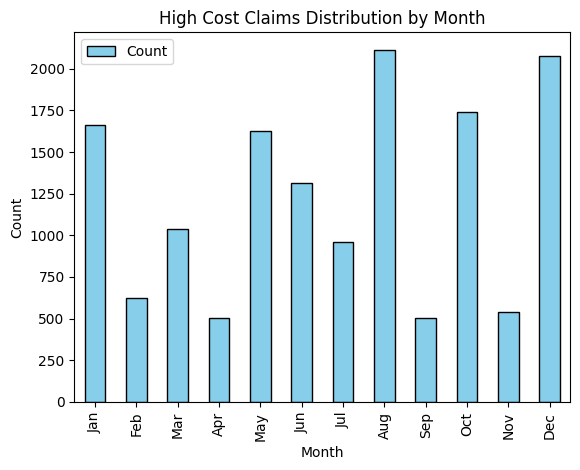

In [104]:
month_counts_pd = month_counts.to_pandas()

month_counts_pd.plot(kind="bar", x="Month", y="Count", color='skyblue', edgecolor='black')
plt.title("High Cost Claims Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show() 